Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Target variable categories: ['yes', 'no']
0.8603651987110634
[[629  55]
 [ 75 172]]
              precision    recall  f1-score   support

          no       0.89      0.92      0.91       684
         yes       0.76      0.70      0.73       247

    accuracy                           0.86       931
   macro avg       0.83      0.81      0.82       931
weighted avg       0.86      0.86      0.86       931

[0.0089482  0.3302555  0.         0.52903671 0.         0.
 0.         0.06220005 0.04160725 0.02795229 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

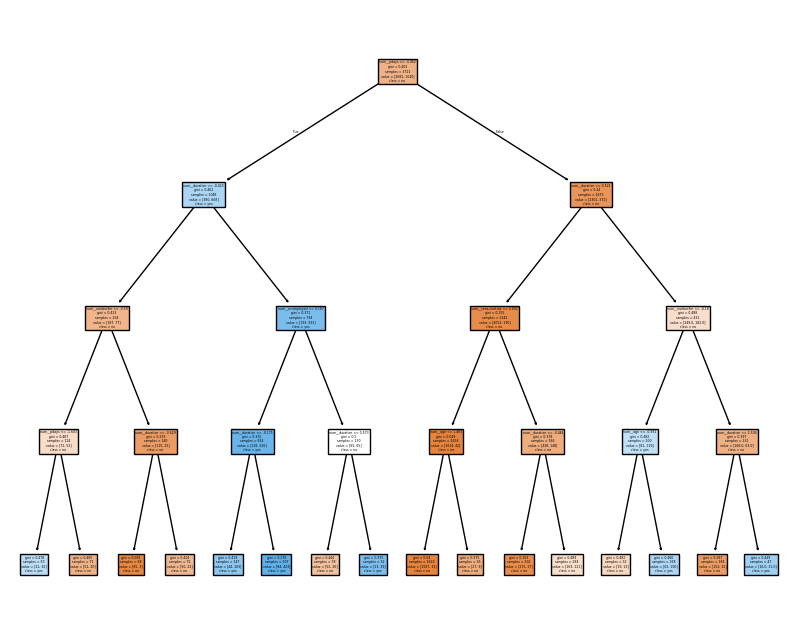

  (0, 0)	1
  (0, 1)	1
  (0, 9)	1
  (0, 10)	1
  (0, 12)	1
4
16
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
0.8603651987110634
[[629  55]
 [ 75 172]]
              precision    recall  f1-score   support

          no       0.89      0.92      0.91       684
         yes       0.76      0.70      0.73       247

    accuracy                           0.86       931
   macro avg       0.83      0.81      0.82       931
weighted avg       0.86      0.86      0.86       931

{'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__min_samples_split': 2}
0.8368719780616296
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(step

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

df.dropna()
# Replace 'unknown' with NaN
df.replace('unknown', pd.NA, inplace=True)
# Drop rows with NaN values in any column
df.dropna(inplace=True)
# Replace 'nonexistent' with NaN
df.replace('nonexistent', pd.NA, inplace=True)
# Drop rows with NaN values in any column
df.dropna(inplace=True)

# Split the data
X=df.drop(columns=['y'])
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sample data
#categorical_columns = {'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'management', 'entrepreneur', 'student', 'retired', 'unemployed'],
#        'marital': ['married', 'single', 'divorced'],
#        'education' : ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'illeterate'],
#        'default' : ['no'],
#        'housing' : ['no', 'yes'],
#        'loan' : ['no', 'yes'],
#        'contact' : ['telephone', 'cellular'],
#        'day_of_week' : ['mon', 'tue', 'wed', 'thu', 'fri'],
#        'month' : ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
#        'poutcome' : ['failure', 'success'],
#        'y' : ['yes', 'no']
#           }

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#df['y_num'] = df['y'].replace({'yes': 1, 'no': 0})
categorical_columns_y = df['y'].unique().tolist()

# Print the identified columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)
print("Target variable categories:", categorical_columns_y)

# Create transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_columns),
        ('cat', cat_transformer, categorical_columns)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [2, 3, 4, 5, 6],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}


# Create a grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Fit the model and time it
start_time = time.time()
grid_search.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

# Make predictions on the test set
y_pred = best_model.predict(X_test) # This line is added to assign y_pred

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Access the DecisionTreeClassifier from the pipeline
clf = best_model.named_steps['classifier']
print(clf.feature_importances_)

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()  # Access from best_model

# Convert X_test to numpy array and then to DataFrame with feature names
X_test_transformed = pd.DataFrame(best_model.named_steps['preprocessor'].transform(X_test), columns=feature_names) # Access from best_model

# Now you can access rows using .iloc
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=clf.classes_) # Use clf.classes_ for class names
plt.show()

# Access the first row of the transformed data
first_row = X_test_transformed.iloc[[0]]  # Use .iloc to access rows by index

# ... (rest of your code) ...
print(clf.decision_path(first_row))  # Pass the DataFrame row to decision_path(tree.export_text(clf))

print(clf.get_depth())
print(clf.get_n_leaves())
print(clf.get_params())
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.cv_results_)
print(grid_search.scorer_)


print(fit_time)     #DT=11s;
print(train_score)  #DT=0.85;
print(test_score)   #DT=0.86;

